<a href="https://colab.research.google.com/github/ttjh1234/CSproject_SDA/blob/main/OpenPose_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenPose with tensorflow

## 넷빌더 깃클론하기

In [ ]:
cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/michalfaber/tf_netbuilder.git

fatal: destination path 'tf_netbuilder' already exists and is not an empty directory.


In [ ]:
cd "/content/drive/MyDrive/tf_netbuilder"

/content/drive/MyDrive/tf_netbuilder


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 516.2 MB 26 kB/s 
     |████████████████████████████████| 70 kB 7.9 MB/s 
     |████████████████████████████████| 36.7 MB 1.1 MB/s 
     |████████████████████████████████| 11.6 MB 57.0 MB/s 
     |████████████████████████████████| 454 kB 87.7 MB/s 
     |████████████████████████████████| 3.0 MB 76.2 MB/s 
     |████████████████████████████████| 20.1 MB 73.6 MB/s 
     |████████████████████████████████| 2.9 MB 79.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Att

In [ ]:
!pip uninstall tf-nightly
!pip install tensorflow --upgrade --force-reinstall

     |███████████████████████████▏    | 422.3 MB 117.0 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 497.5 MB 18 kB/s 
     |████████████████████████████████| 462 kB 67.4 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 4.4 MB 57.2 MB/s 
     |████████████████████████████████| 126 kB 90.7 MB/s 
     |████████████████████████████████| 15.7 MB 71.8 MB/s 
     |████████████████████████████████| 14.5 MB 59.0 MB/s 
     |████████████████████████████████| 1.1 MB 67.7 MB/s 
     |████████████████████████████████| 2.1 MB 76.7 MB/s 
     |████████████████████████████████| 5.8 MB 74.6 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 1.0 MB 69.0 MB/s 
     |████████████████████████████████| 4.1 MB 76.1 MB/s 
     |████████████████████████████████| 1.4 MB 76.1 MB/s 
     |████████████████████████████████| 156 kB 84.6 MB/s 
     |██████████████

## 오픈포즈 텐서플로 깃클론

In [ ]:
from tf_netbuilder.builder import NetModule
from tf_netbuilder.files import download_checkpoint
import tensorflow as tf

In [ ]:
class OpenPose2BranchesVGG(tf.keras.Model):

    _model_def = {
        'inputs#': [
            ['img#norm05', 'mask_s#', 'mask_l#']
        ],

        # VGG19 backbone

        'backbone#': [
            ['select:img#'],
            ['block1_conv1#cnreg_r1_k3_s1_c64_nre'],
            ['block1_conv2#cnreg_r1_k3_s1_c64_nre'],
            ['maxpool_r1_k2_s2'],
            ['block2_conv1#cnreg_r1_k3_s1_c128_nre'],
            ['block2_conv2#cnreg_r1_k3_s1_c128_nre'],
            ['maxpool_r1_k2_s2'],
            ['block3_conv1#cnreg_r1_k3_s1_c256_nre'],
            ['block3_conv2#cnreg_r1_k3_s1_c256_nre'],
            ['block3_conv3#cnreg_r1_k3_s1_c256_nre'],
            ['block3_conv4#cnreg_r1_k3_s1_c256_nre'],
            ['maxpool_r1_k2_s2'],
            ['block4_conv1#cnreg_r1_k3_s1_c512_nre'],
            ['block4_conv2#cnreg_r1_k3_s1_c512_nre'],
            ['cnreg_r1_k3_s1_c256_nre'],
            ['cnreg_r1_k3_s1_c128_nre']
        ],

        # stage 0 - S (38)

        'stage_0_s#': [
            ['select:backbone#'],
            ['cnreg_r3_k3_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c512_nre'],
            ['cn3_r1_k1_s1_c38']
        ],
        'stage_0_s_masked#': [
            ['select:stage_0_s#:mask_s#'],
            ['mul:'],
        ],

        # stage 0 - L (19)

        'stage_0_l#': [
            ['select:backbone#'],
            ['cnreg_r3_k3_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c512_nre'],
            ['cn3_r1_k1_s1_c19']
        ],
        'stage_0_l_masked#': [
            ['select:stage_0_l#:mask_l#'],
            ['mul:'],
        ],

        # stage 1 - S (38)

        'stage_0_out#': [
            ['select:stage_0_s#:stage_0_l#:backbone#'],
            ['cnct:'],
        ],
        'stage_1_s#': [
            ['select:stage_0_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c38']
        ],
        'stage_1_s_masked#': [
            ['select:stage_1_s#:mask_s#'],
            ['mul:'],
        ],

        # stage 1 - L (19)

        'stage_1_l#': [
            ['select:stage_0_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c19']
        ],
        'stage_1_l_masked#': [
            ['select:stage_1_l#:mask_l#'],
            ['mul:'],
        ],

        # stage 2 - S (38)

        'stage_1_out#': [
            ['select:stage_1_s#:stage_1_l#:backbone#'],
            ['cnct:'],
        ],
        'stage_2_s#': [
            ['select:stage_1_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c38']
        ],
        'stage_2_s_masked#': [
            ['select:stage_2_s#:mask_s#'],
            ['mul:'],
        ],

        # stage 2 - L (19)

        'stage_2_l#': [
            ['select:stage_1_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c19']
        ],
        'stage_2_l_masked#': [
            ['select:stage_2_l#:mask_l#'],
            ['mul:'],
        ],

        # stage 3 - S (38)

        'stage_2_out#': [
            ['select:stage_2_s#:stage_2_l#:backbone#'],
            ['cnct:'],
        ],
        'stage_3_s#': [
            ['select:stage_2_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c38']
        ],
        'stage_3_s_masked#': [
            ['select:stage_3_s#:mask_s#'],
            ['mul:'],
        ],

        # stage 3 - L (19)

        'stage_3_l#': [
            ['select:stage_2_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c19']
        ],
        'stage_3_l_masked#': [
            ['select:stage_3_l#:mask_l#'],
            ['mul:'],
        ],

        # stage 4 - S (38)

        'stage_3_out#': [
            ['select:stage_3_s#:stage_3_l#:backbone#'],
            ['cnct:'],
        ],
        'stage_4_s#': [
            ['select:stage_3_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c38']
        ],
        'stage_4_s_masked#': [
            ['select:stage_4_s#:mask_s#'],
            ['mul:'],
        ],

        # stage 4 - L (19)

        'stage_4_l#': [
            ['select:stage_3_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c19']
        ],
        'stage_4_l_masked#': [
            ['select:stage_4_l#:mask_l#'],
            ['mul:'],
        ],

        # stage 5 - S (38)

        'stage_4_out#': [
            ['select:stage_4_s#:stage_4_l#:backbone#'],
            ['cnct:'],
        ],
        'stage_5_s#': [
            ['select:stage_4_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c38']
        ],
        'stage_5_s_masked#': [
            ['select:stage_5_s#:mask_s#'],
            ['mul:'],
        ],

        # stage 5 - L (19)

        'stage_5_l#': [
            ['select:stage_4_out#'],
            ['cnreg_r5_k7_s1_c128_nre'],
            ['cnreg_r1_k1_s1_c128_nre'],
            ['cn3_r1_k1_s1_c19']
        ],
        'stage_5_l_masked#': [
            ['select:stage_5_l#:mask_l#'],
            ['mul:'],
        ],
    }

    _model_ins = 'inputs#'

    _model_outs = ['stage_0_s_masked#', 'stage_0_l_masked#',
                   'stage_1_s_masked#', 'stage_1_l_masked#',
                   'stage_2_s_masked#', 'stage_2_l_masked#',
                   'stage_3_s_masked#', 'stage_3_l_masked#',
                   'stage_4_s_masked#', 'stage_4_l_masked#',
                   'stage_5_s_masked#', 'stage_5_l_masked#',
                   ]

    def __init__(self, in_chs, training):
        super(OpenPose2BranchesVGG, self).__init__(name="OpenPose2BrVGG")

        model_def = self._model_def
        model_ins = self._model_ins
        model_outs = self._model_outs

        if not training:
            # single input without masks
            model_def['inputs#'] = [
                ['img#norm05']
            ]
            # remove masking - no need in prediction
            model_def = {k: v for k, v in model_def.items() if 'masked' not in k}
            # unmasked outputs
            model_outs = ['stage_0_s#', 'stage_0_l#',
                          'stage_1_s#', 'stage_1_l#',
                          'stage_2_s#', 'stage_2_l#',
                          'stage_3_s#', 'stage_3_l#',
                          'stage_4_s#', 'stage_4_l#',
                          'stage_5_s#', 'stage_5_l#']

        self.net = NetModule(model_def,
                             model_ins,
                             model_outs, in_chs=in_chs, name="VGG")

    def call(self, inputs):
        x = self.net(inputs)

        return x


def create_openpose_2branches_vgg(pretrained=False, training=False):

    pretrained_url = "https://github.com/michalfaber/tensorflow_Realtime_Multi-Person_Pose_Estimation/releases/download/v1.0/openpose_2br_vgg.zip"

    if training:
        model = OpenPose2BranchesVGG(in_chs=[3, 38, 19], training=training)
        model.build([tf.TensorShape((None, None, None, 3)),
                     tf.TensorShape((None, None, None, 38)),
                     tf.TensorShape((None, None, None, 19))
                     ])
    else:
        model = OpenPose2BranchesVGG(in_chs=[3], training=training)
        model.build([tf.TensorShape((None, None, None, 3))])

    if pretrained:
        path = download_checkpoint(pretrained_url)
        model.load_weights(path)

    return model

In [ ]:
cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/michalfaber/tensorflow_Realtime_Multi-Person_Pose_Estimation.git

fatal: destination path 'tensorflow_Realtime_Multi-Person_Pose_Estimation' already exists and is not an empty directory.


In [ ]:
cd "/content/drive/MyDrive/tensorflow_Realtime_Multi-Person_Pose_Estimation"

/content/drive/MyDrive/tensorflow_Realtime_Multi-Person_Pose_Estimation


In [ ]:
cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/tensorpack/tensorpack.git

Cloning into 'tensorpack'...
remote: Enumerating objects: 29020, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 29020 (delta 12), reused 15 (delta 3), pack-reused 28981
Receiving objects: 100% (29020/29020), 8.86 MiB | 5.95 MiB/s, done.
Resolving deltas: 100% (22596/22596), done.
Checking out files: 100% (360/360), done.


In [ ]:
cd "/content/drive/MyDrive/tensorpack/"

/content/drive/MyDrive/tensorpack


In [ ]:
import tensorpack

In [ ]:
pip install --upgrade git+https://github.com/tensorpack/tensorpack.git

  Cloning https://github.com/tensorpack/tensorpack.git to /tmp/pip-req-build-pzk431g0
  Running command git clone -q https://github.com/tensorpack/tensorpack.git /tmp/pip-req-build-pzk431g0
  Created wheel for tensorpack: filename=tensorpack-0.11-py2.py3-none-any.whl size=296430 sha256=457c272388d9a9c81a37e8d2cbedcd056361e80f8e545c9ced7e409fde0c3d10
  Stored in directory: /tmp/pip-ephem-wheel-cache-oxi0gjk6/wheels/e4/fa/07/f74112cc27702aa85de038d7d8e87a236acbed8318ce05ea4c
Successfully built tensorpack


In [ ]:
cd "/content/drive/MyDrive/tensorflow_Realtime_Multi-Person_Pose_Estimation"

/content/drive/MyDrive/tensorflow_Realtime_Multi-Person_Pose_Estimation


In [ ]:
import datetime
from datetime import timedelta
from timeit import default_timer as timer

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tf_netbuilder_ext.extensions import register_tf_netbuilder_extensions

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from models import create_openpose_2branches_vgg

In [ ]:
from util import plot_to_image, probe_model_2br_vgg

In [ ]:
import dataset
import estimation
import models
import tf_netbuilder_ext

In [ ]:
from dataset.generators import get_dataset_with_masks

In [ ]:
annot_path_train = '/content/drive/MyDrive/coco/annotations/person_keypoints_train2017.json'
img_dir_train = '/content/drive/MyDrive/coco/images/train2017/'
annot_path_val = '/content/drive/MyDrive/coco/annotations/person_keypoints_val2017.json'
img_dir_val = '/content/drive/MyDrive/coco/images/val2017/'

In [ ]:
checkpoints_folder = './tf_ckpts_2br_vgg'
output_weights = 'output_2br_vgg/openpose_2br_vgg'
batch_size = 10
lr = 5e-5
max_epochs = 300

In [ ]:
from_vgg = {
    'VGG/backbone/block1_conv1': 'block1_conv1',
    'VGG/backbone/block1_conv2': 'block1_conv2',
    'VGG/backbone/block2_conv1': 'block2_conv1',
    'VGG/backbone/block2_conv2': 'block2_conv2',
    'VGG/backbone/block3_conv1': 'block3_conv1',
    'VGG/backbone/block3_conv2': 'block3_conv2',
    'VGG/backbone/block3_conv3': 'block3_conv3',
    'VGG/backbone/block3_conv4': 'block3_conv4',
    'VGG/backbone/block4_conv1': 'block4_conv1',
    'VGG/backbone/block4_conv2': 'block4_conv2'
}

In [ ]:
def load_initial_vgg19_weights(model):
    """
    """
    print("Loading vgg19 weights...")

    vgg_model = VGG19(include_top=False, weights='imagenet')
    for w in model.weights:

        idx = w.name.find("/kernel")
        if idx > -1:
            nn = w.name[:idx]
            vgg_layer_name = from_vgg.get(nn)
            if vgg_layer_name:
                weights = vgg_model.get_layer(vgg_layer_name).get_weights()[0]
                w.assign(weights)
                print("Loaded VGG19 : " + w.name)
                continue

        idx = w.name.find("/bias")
        if idx > -1:
            nn = w.name[:idx]
            vgg_layer_name = from_vgg.get(nn)
            if vgg_layer_name:
                weights = vgg_model.get_layer(vgg_layer_name).get_weights()[1]
                w.assign(weights)
                print("Loaded VGG19 : " + w.name)

In [ ]:
def eucl_loss(y_true, y_pred):
    return tf.reduce_sum(tf.math.squared_difference(y_pred, y_true)) / batch_size / 2

In [ ]:
@tf.function
def train_one_step(model, optimizer, x, y_true):
    with tf.GradientTape() as tape:
        y_pred = model(x)

        losses = [eucl_loss(y_true[0], y_pred[0]),
            eucl_loss(y_true[1], y_pred[1]),
            eucl_loss(y_true[0], y_pred[2]),
            eucl_loss(y_true[1], y_pred[3]),
            eucl_loss(y_true[0], y_pred[4]),
            eucl_loss(y_true[1], y_pred[5]),
            eucl_loss(y_true[0], y_pred[6]),
            eucl_loss(y_true[1], y_pred[7]),
            eucl_loss(y_true[0], y_pred[8]),
            eucl_loss(y_true[1], y_pred[9]),
            eucl_loss(y_true[0], y_pred[10]),
            eucl_loss(y_true[1], y_pred[11])]

        total_loss = tf.reduce_sum(losses)

    grads = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    return losses, total_loss

In [ ]:
def train(ds_train, ds_val, model, optimizer, ckpt, last_epoch, last_step, max_epochs, steps_per_epoch):
    train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
    train_loss_heatmap = tf.keras.metrics.Mean('train_loss_heatmap', dtype=tf.float32)
    train_loss_paf = tf.keras.metrics.Mean('train_loss_paf', dtype=tf.float32)

    val_loss = tf.keras.metrics.Mean('val_loss', dtype=tf.float32)
    val_loss_heatmap = tf.keras.metrics.Mean('val_loss_heatmap', dtype=tf.float32)
    val_loss_paf = tf.keras.metrics.Mean('val_loss_paf', dtype=tf.float32)

    current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    train_log_dir = 'logs_2br_vgg/gradient_tape/' + current_time + '/train'
    train_summary_writer = tf.summary.create_file_writer(train_log_dir)
    val_log_dir = 'logs_2br_vgg/gradient_tape/' + current_time + '/val'
    val_summary_writer = tf.summary.create_file_writer(val_log_dir)

    output_paf_idx = 10
    output_heatmap_idx = 11

    # determine start epoch in case the training has been stopped manually and resumed

    resume = last_step != 0 and (steps_per_epoch - last_step) != 0
    if resume:
        start_epoch = last_epoch
    else:
        start_epoch = last_epoch + 1

    # start processing

    for epoch in range(start_epoch, max_epochs + 1, 1):

        start = timer()

        print("Start processing epoch {}".format(epoch))

        # set the initial step index depending on if you resumed the processing

        if resume:
            step = last_step + 1
            data_iter = ds_train.skip(last_step)
            print(f"Skipping {last_step} steps (May take a few minutes)...")
            resume = False
        else:
            step = 0
            data_iter = ds_train

        # process steps

        for x, y in data_iter:

            step += 1

            losses, total_loss = train_one_step(model, optimizer, x, y)

            train_loss(total_loss)
            train_loss_heatmap(losses[output_heatmap_idx])
            train_loss_paf(losses[output_paf_idx])

            if step % 10 == 0:
                tf.print('Epoch', epoch, f'Step {step}/{steps_per_epoch}',
                         '(1)', losses[0], '(2)', losses[1], '(3)', losses[2], '(4)', losses[3],
                         '(5)', losses[4], '(6)', losses[5], '(7)', losses[6], '(8)', losses[7],
                         '(9)', losses[8], '(10)', losses[9], '(11)', losses[10], '(12)', losses[11],
                         'Total loss', total_loss)

                with train_summary_writer.as_default():
                    summary_step = (epoch - 1) * steps_per_epoch + step - 1
                    tf.summary.scalar('loss', train_loss.result(), step=summary_step)
                    tf.summary.scalar('loss_heatmap', train_loss_heatmap.result(), step=summary_step)
                    tf.summary.scalar('loss_paf', train_loss_paf.result(), step=summary_step)

            if step % 100 == 0:
                figure = probe_model_2br_vgg(model, test_img_path="resources/ski_368.jpg")
                with train_summary_writer.as_default():
                    tf.summary.image("Test prediction", plot_to_image(figure), step=step)

            if step % 1000 == 0:
                ckpt.step.assign(step)
                ckpt.epoch.assign(epoch)
                save_path = manager.save()
                print("Saved checkpoint for step {}: {}".format(step, save_path))

            if step >= steps_per_epoch:
                break

        print("Completed epoch {}. Saving weights...".format(epoch))
        model.save_weights(output_weights, overwrite=True)

        # save checkpoint at the end of an epoch

        ckpt.step.assign(step)
        ckpt.epoch.assign(epoch)
        manager.save()

        # reset metrics every epoch

        train_loss.reset_states()
        train_loss_heatmap.reset_states()
        train_loss_paf.reset_states()

        end = timer()

        print("Epoch training time: " + str(timedelta(seconds=end - start)))

        # calculate validation loss

        print("Calculating validation losses...")

        for val_step, (x_val, y_val_true) in enumerate(ds_val):

            if val_step % 1000 == 0:
                print(f"Validation step {val_step} ...")

            y_val_pred = model(x_val)

            losses = [eucl_loss(y_val_true[0], y_val_pred[0]),
                      eucl_loss(y_val_true[1], y_val_pred[1]),
                      eucl_loss(y_val_true[0], y_val_pred[2]),
                      eucl_loss(y_val_true[1], y_val_pred[3]),
                      eucl_loss(y_val_true[0], y_val_pred[4]),
                      eucl_loss(y_val_true[1], y_val_pred[5]),
                      eucl_loss(y_val_true[0], y_val_pred[6]),
                      eucl_loss(y_val_true[1], y_val_pred[7]),
                      eucl_loss(y_val_true[0], y_val_pred[8]),
                      eucl_loss(y_val_true[1], y_val_pred[9]),
                      eucl_loss(y_val_true[0], y_val_pred[10]),
                      eucl_loss(y_val_true[1], y_val_pred[11])]

            total_loss = tf.reduce_sum(losses)
            val_loss(total_loss)
            val_loss_heatmap(losses[output_heatmap_idx])
            val_loss_paf(losses[output_paf_idx])

        val_loss_res = val_loss.result()
        val_loss_heatmap_res = val_loss_heatmap.result()
        val_loss_paf_res = val_loss_paf.result()

        print(f'Validation losses for epoch: {epoch} : Loss paf {val_loss_paf_res}, Loss heatmap '
              f'{val_loss_heatmap_res}, Total loss {val_loss_res}')

        with val_summary_writer.as_default():
            tf.summary.scalar('val_loss', val_loss_res, step=epoch)
            tf.summary.scalar('val_loss_heatmap', val_loss_heatmap_res, step=epoch)
            tf.summary.scalar('val_loss_paf', val_loss_paf_res, step=epoch)
        val_loss.reset_states()
        val_loss_heatmap.reset_states()
        val_loss_paf.reset_states()

In [ ]:
%matplotlib inline
import os
import sys
import math
import cv2
import matplotlib
import pylab as plt
import numpy as np
import util

from numpy import ma
import tensorflow as tf
from scipy.ndimage.filters import gaussian_filter

new_path = r'../tf_netbuilder'
sys.path.append(new_path)


from tf_netbuilder_ext.extensions import register_tf_netbuilder_extensions

register_tf_netbuilder_extensions()

In [ ]:
#from models.openpose_2br_vgg import create_openpose_2branches_vgg

# Uncomment the relevant section: 1) pretrained model OR 2) model with loaded checkpoint

model = create_openpose_2branches_vgg(pretrained=True, training=False)

Downloading: "https://github.com/michalfaber/tensorflow_Realtime_Multi-Person_Pose_Estimation/releases/download/v1.0/openpose_2br_vgg.zip" to /root/.cache/tf_netbuilder/checkpoints/openpose_2br_vgg.zip


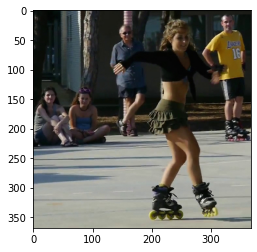

In [ ]:
test_image = 'resources/ski_368.jpg'
oriImg = cv2.imread(test_image) # B,G,R order
plt.imshow(oriImg[:,:,[2,1,0]])

In [ ]:
oriImg.shape

(368, 368, 3)

In [ ]:
model.summary()

Model: "OpenPose2BrVGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 VGG (NetModule)             multiple                  52311446  
                                                                 
Total params: 52,311,446
Trainable params: 52,311,446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import cv2

Input shape: (1, 368, 368, 3)
Output shape (heatmap): (1, 46, 46, 19)
Output shape (paf): (1, 46, 46, 38)
Input shape: (1, 368, 368, 3)
Output shape (heatmap): (1, 46, 46, 19)
Output shape (paf): (1, 46, 46, 38)
Input shape: (1, 368, 368, 3)
Output shape (heatmap): (1, 46, 46, 19)
Output shape (paf): (1, 46, 46, 38)
Input shape: (1, 368, 368, 3)
Output shape (heatmap): (1, 46, 46, 19)
Output shape (paf): (1, 46, 46, 38)


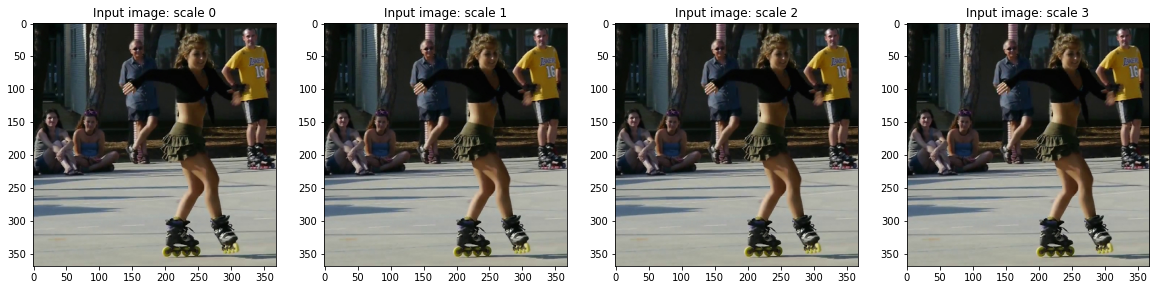

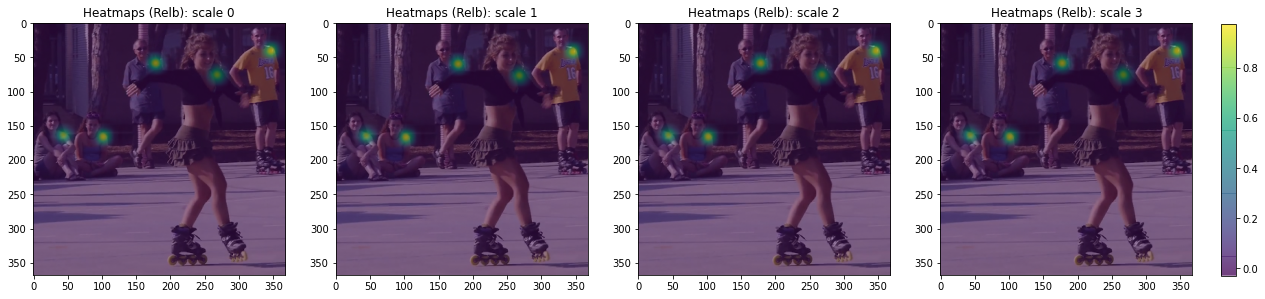

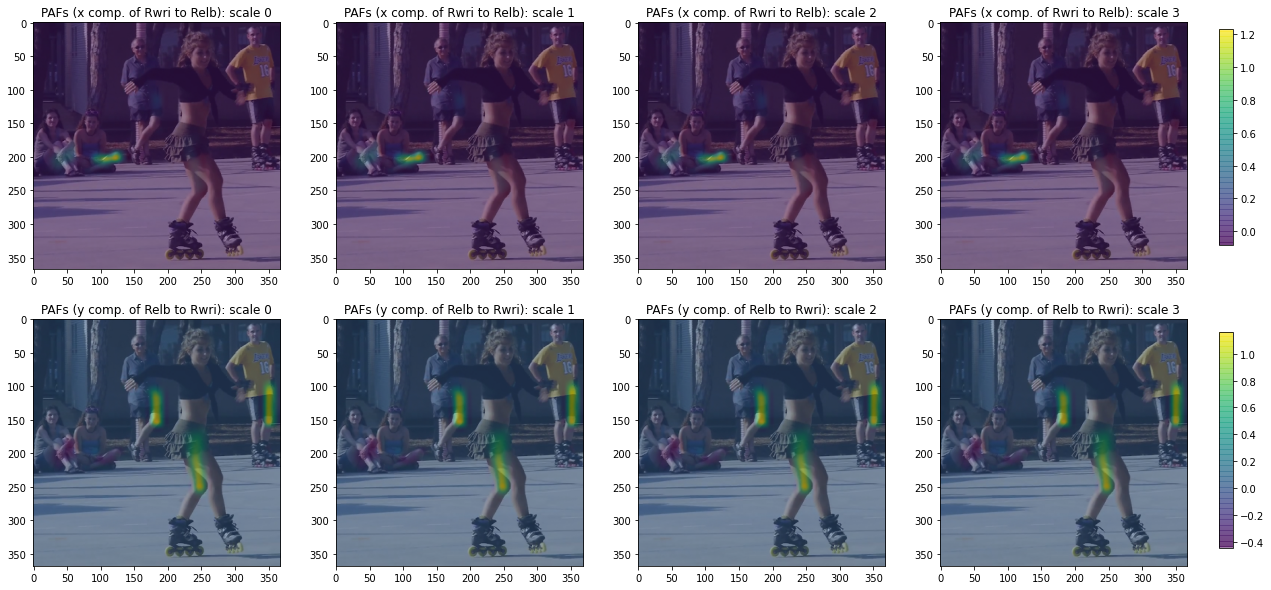

In [ ]:
thre1 = 0.1
stride = 8
padValue = 128
multiplier = [0.5, 1, 1.5, 2]

heatmap_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], 19))
paf_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], 38))
# first figure shows padded images
f, axarr = plt.subplots(1, len(multiplier))
f.set_size_inches((20, 5))
# second figure shows heatmaps
f2, axarr2 = plt.subplots(1, len(multiplier))
f2.set_size_inches((20, 5))
# third figure shows PAFs
f3, axarr3 = plt.subplots(2, len(multiplier))
f3.set_size_inches((20, 10))

for m in range(len(multiplier)):
    scale = multiplier[m]
    #imageToTest = cv2.resize(oriImg, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    imageToTest = oriImg
    imageToTest_padded, pad = util.pad_right_down_corner(imageToTest, stride, padValue)        
    axarr[m].imshow(imageToTest_padded[:,:,[2,1,0]])
    axarr[m].set_title('Input image: scale %d' % m)

    input_img = np.transpose(np.float32(imageToTest_padded[:,:,:,np.newaxis]), (3,0,1,2)) # required shape (1, width, height, channels) 
    print("Input shape: " + str(input_img.shape))  

    output_blobs = model.predict(input_img)
    paf = output_blobs[10]
    heatmap = output_blobs[11]
        
    print("Output shape (heatmap): " + str(heatmap.shape))
    print("Output shape (paf): " + str(paf.shape))
    
    # extract outputs, resize, and remove padding
    heatmap = np.squeeze(heatmap) # output 1 is heatmaps
    heatmap = cv2.resize(heatmap, (0,0), fx=stride, fy=stride, interpolation=cv2.INTER_CUBIC)
    heatmap = heatmap[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3], :]
    heatmap = cv2.resize(heatmap, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv2.INTER_CUBIC)
    
    paf = np.squeeze(paf) # output 0 is PAFs
    paf = cv2.resize(paf, (0,0), fx=stride, fy=stride, interpolation=cv2.INTER_CUBIC)
    paf = paf[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3], :]
    paf = cv2.resize(paf, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv2.INTER_CUBIC)
    
    # visualization
    axarr2[m].imshow(oriImg[:,:,[2,1,0]])
    ax2 = axarr2[m].imshow(heatmap[:,:,5], alpha=.5) # right elbow
    axarr2[m].set_title('Heatmaps (Relb): scale %d' % m)
    
    axarr3.flat[m].imshow(oriImg[:,:,[2,1,0]])
    ax3x = axarr3.flat[m].imshow(paf[:,:,8], alpha=.5) # right elbow
    axarr3.flat[m].set_title('PAFs (x comp. of Rwri to Relb): scale %d' % m)
    axarr3.flat[len(multiplier) + m].imshow(oriImg[:,:,[2,1,0]])
    ax3y = axarr3.flat[len(multiplier) + m].imshow(paf[:,:,9], alpha=.5) # right wrist
    axarr3.flat[len(multiplier) + m].set_title('PAFs (y comp. of Relb to Rwri): scale %d' % m)
    
    heatmap_avg = heatmap_avg + heatmap / len(multiplier)
    paf_avg = paf_avg + paf / len(multiplier)

f2.subplots_adjust(right=0.93)
cbar_ax = f2.add_axes([0.95, 0.15, 0.01, 0.7])
_ = f2.colorbar(ax2, cax=cbar_ax)

f3.subplots_adjust(right=0.93)
cbar_axx = f3.add_axes([0.95, 0.57, 0.01, 0.3])
_ = f3.colorbar(ax3x, cax=cbar_axx)
cbar_axy = f3.add_axes([0.95, 0.15, 0.01, 0.3])
_ = f3.colorbar(ax3y, cax=cbar_axy)

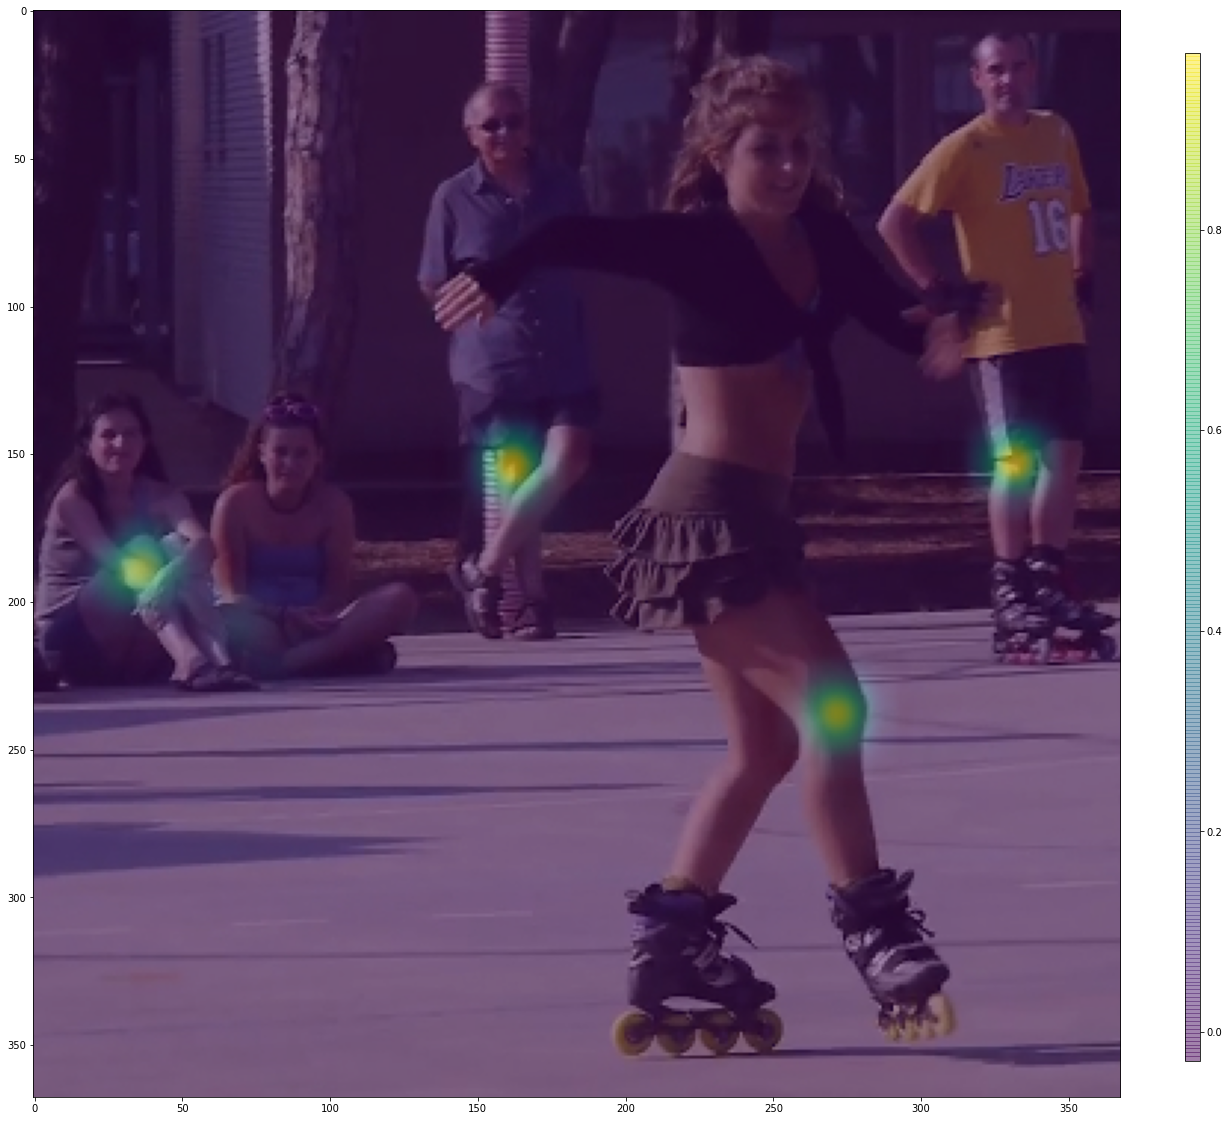

In [ ]:
plt.imshow(oriImg[:,:,[2,1,0]])
plt.imshow(heatmap_avg[:,:,9], alpha=.5)
fig = matplotlib.pyplot.gcf()
cax = matplotlib.pyplot.gca()
fig.set_size_inches(20, 20)
fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
_ = fig.colorbar(ax2, cax=cbar_ax)

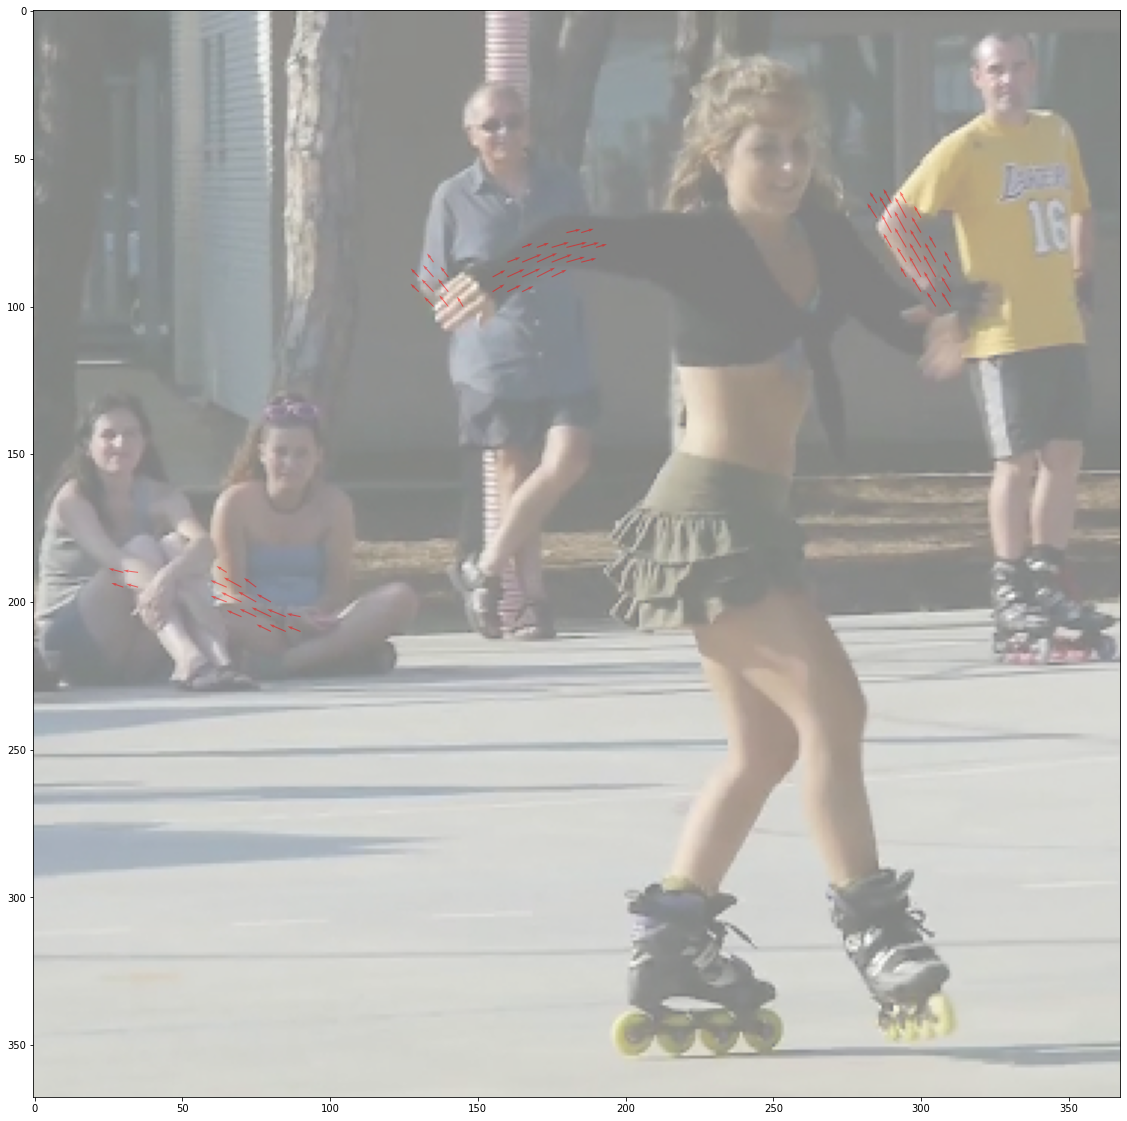

In [ ]:
U = paf_avg[:,:,16] * -1
V = paf_avg[:,:,17]
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.5 * 0.5] = True
U = ma.masked_array(U, mask=M)
V = ma.masked_array(V, mask=M)

# 1
plt.figure()
plt.imshow(oriImg[:,:,[2,1,0]], alpha = .5)
s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)

In [ ]:
all_peaks = []
peak_counter = 0

for part in range(19-1):
    map_ori = heatmap_avg[:,:,part]
    map = gaussian_filter(map_ori, sigma=3)
    
    map_left = np.zeros(map.shape)
    map_left[1:,:] = map[:-1,:]
    map_right = np.zeros(map.shape)
    map_right[:-1,:] = map[1:,:]
    map_up = np.zeros(map.shape)
    map_up[:,1:] = map[:,:-1]
    map_down = np.zeros(map.shape)
    map_down[:,:-1] = map[:,1:]
    
    peaks_binary = np.logical_and.reduce((map>=map_left, map>=map_right, map>=map_up, map>=map_down, map > thre1))
    peaks = list(zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0])) # note reverse
    peaks_with_score = [x + (map_ori[x[1],x[0]],) for x in peaks]
    id = range(peak_counter, peak_counter + len(peaks))
    peaks_with_score_and_id = [peaks_with_score[i] + (id[i],) for i in range(len(id))]

    all_peaks.append(peaks_with_score_and_id)
    peak_counter += len(peaks)

In [ ]:
all_peaks

[[(330, 23, 0.9131280183792114, 0),
  (158, 42, 0.9687316417694092, 1),
  (255, 52, 0.8983498215675354, 2),
  (29, 146, 0.9613420963287354, 3),
  (86, 153, 0.9380291104316711, 4)],
 [(330, 45, 0.9224165678024292, 5),
  (160, 61, 0.9765296578407288, 6),
  (244, 78, 0.8878887295722961, 7),
  (28, 165, 0.9066800475120544, 8),
  (84, 166, 0.9699324369430542, 9)],
 [(313, 48, 0.8548378944396973, 10),
  (141, 63, 0.9536086320877075, 11),
  (221, 78, 0.724926769733429, 12),
  (13, 165, 0.9226523041725159, 13),
  (68, 166, 0.9464712142944336, 14)],
 [(291, 71, 0.9462171196937561, 15),
  (181, 77, 0.770016074180603, 16),
  (133, 91, 0.8225859999656677, 17),
  (27, 188, 0.7600776553153992, 18),
  (67, 195, 0.898137092590332, 19)],
 [(153, 92, 0.8938260674476624, 20),
  (306, 97, 0.7191611528396606, 21),
  (44, 192, 0.19195760786533356, 22),
  (84, 206, 0.7722951173782349, 23)],
 [(346, 41, 0.9379842281341553, 24),
  (178, 59, 0.9764174222946167, 25),
  (267, 76, 0.8293982744216919, 26),
  (44, 1

In [ ]:
# find connection in the specified sequence, center 29 is in the position 15
limbSeq = [[2,3], [2,6], [3,4], [4,5], [6,7], [7,8], [2,9], [9,10], \
           [10,11], [2,12], [12,13], [13,14], [2,1], [1,15], [15,17], \
           [1,16], [16,18], [3,17], [6,18]]
# the middle joints heatmap correpondence
mapIdx = [[31,32], [39,40], [33,34], [35,36], [41,42], [43,44], [19,20], [21,22], \
          [23,24], [25,26], [27,28], [29,30], [47,48], [49,50], [53,54], [51,52], \
          [55,56], [37,38], [45,46]]

In [ ]:
thre2 = 0.05
connection_all = []
special_k = []
mid_num = 10

for k in range(len(mapIdx)):
    score_mid = paf_avg[:,:,[x-19 for x in mapIdx[k]]]
    candA = all_peaks[limbSeq[k][0]-1]
    candB = all_peaks[limbSeq[k][1]-1]
    nA = len(candA)
    nB = len(candB)
    indexA, indexB = limbSeq[k]
    if(nA != 0 and nB != 0):
        connection_candidate = []
        for i in range(nA):
            for j in range(nB):
                vec = np.subtract(candB[j][:2], candA[i][:2])
                norm = math.sqrt(vec[0]*vec[0] + vec[1]*vec[1])
                # failure case when 2 body parts overlaps
                if norm == 0:
                    continue
                vec = np.divide(vec, norm)
                
                startend = list(zip(np.linspace(candA[i][0], candB[j][0], num=mid_num), \
                               np.linspace(candA[i][1], candB[j][1], num=mid_num)))
                
                vec_x = np.array([score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 0] \
                                  for I in range(len(startend))])
                vec_y = np.array([score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 1] \
                                  for I in range(len(startend))])

                score_midpts = np.multiply(vec_x, vec[0]) + np.multiply(vec_y, vec[1])
                score_with_dist_prior = sum(score_midpts)/len(score_midpts) + min(0.5*oriImg.shape[0]/norm-1, 0)
                criterion1 = len(np.nonzero(score_midpts > thre2)[0]) > 0.8 * len(score_midpts)
                criterion2 = score_with_dist_prior > 0
                if criterion1 and criterion2:
                    connection_candidate.append([i, j, score_with_dist_prior, score_with_dist_prior+candA[i][2]+candB[j][2]])

        connection_candidate = sorted(connection_candidate, key=lambda x: x[2], reverse=True)
        connection = np.zeros((0,5))
        for c in range(len(connection_candidate)):
            i,j,s = connection_candidate[c][0:3]
            if(i not in connection[:,3] and j not in connection[:,4]):
                connection = np.vstack([connection, [candA[i][3], candB[j][3], s, i, j]])
                if(len(connection) >= min(nA, nB)):
                    break

        connection_all.append(connection)
    else:
        special_k.append(k)
        connection_all.append([])

In [ ]:
# last number in each row is the total parts number of that person
# the second last number in each row is the score of the overall configuration
subset = -1 * np.ones((0, 20))
candidate = np.array([item for sublist in all_peaks for item in sublist])

for k in range(len(mapIdx)):
    if k not in special_k:
        partAs = connection_all[k][:,0]
        partBs = connection_all[k][:,1]
        indexA, indexB = np.array(limbSeq[k]) - 1

        for i in range(len(connection_all[k])): #= 1:size(temp,1)
            found = 0
            subset_idx = [-1, -1]
            for j in range(len(subset)): #1:size(subset,1):
                if subset[j][indexA] == partAs[i] or subset[j][indexB] == partBs[i]:
                    subset_idx[found] = j
                    found += 1
            
            if found == 1:
                j = subset_idx[0]
                if(subset[j][indexB] != partBs[i]):
                    subset[j][indexB] = partBs[i]
                    subset[j][-1] += 1
                    subset[j][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]
            elif found == 2: # if found 2 and disjoint, merge them
                j1, j2 = subset_idx
                print ("found = 2")
                membership = ((subset[j1]>=0).astype(int) + (subset[j2]>=0).astype(int))[:-2]
                if len(np.nonzero(membership == 2)[0]) == 0: #merge
                    subset[j1][:-2] += (subset[j2][:-2] + 1)
                    subset[j1][-2:] += subset[j2][-2:]
                    subset[j1][-2] += connection_all[k][i][2]
                    subset = np.delete(subset, j2, 0)
                else: # as like found == 1
                    subset[j1][indexB] = partBs[i]
                    subset[j1][-1] += 1
                    subset[j1][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]

            # if find no partA in the subset, create a new subset
            elif not found and k < 17:
                row = -1 * np.ones(20)
                row[indexA] = partAs[i]
                row[indexB] = partBs[i]
                row[-1] = 2
                row[-2] = sum(candidate[connection_all[k][i,:2].astype(int), 2]) + connection_all[k][i][2]
                subset = np.vstack([subset, row])

In [ ]:
# delete some rows of subset which has few parts occur
deleteIdx = [];
for i in range(len(subset)):
    if subset[i][-1] < 4 or subset[i][-2]/subset[i][-1] < 0.4:
        deleteIdx.append(i)
subset = np.delete(subset, deleteIdx, axis=0)

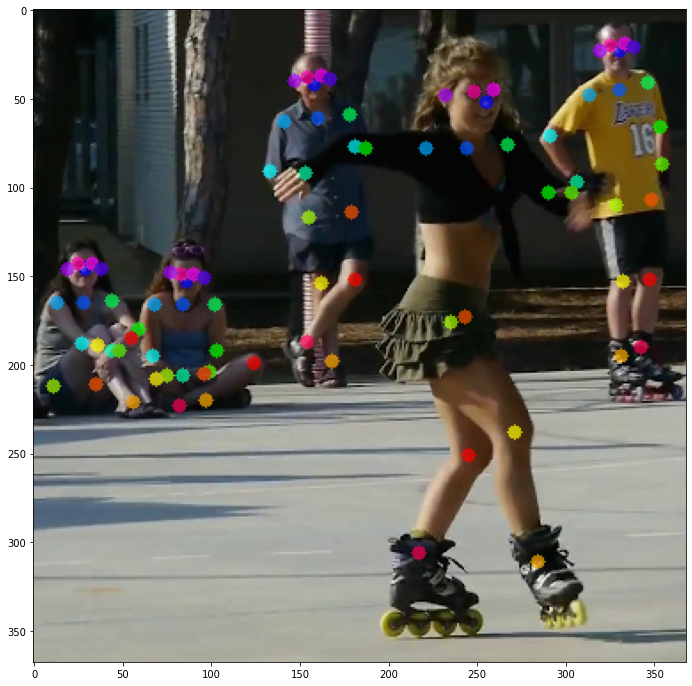

In [ ]:
# visualize
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
cmap = matplotlib.cm.get_cmap('hsv')

canvas = cv2.imread(test_image) # B,G,R order

for i in range(18):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    for j in range(len(all_peaks[i])):
        cv2.circle(canvas, all_peaks[i][j][0:2], 4, colors[i], thickness=-1)

to_plot = cv2.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

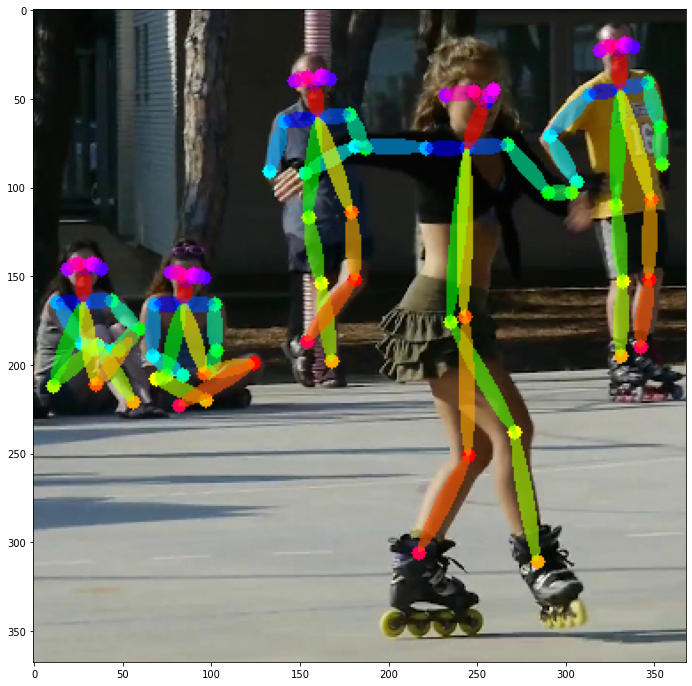

In [ ]:
# visualize 2
stickwidth = 4

for i in range(17):
    for n in range(len(subset)):
        index = subset[n][np.array(limbSeq[i])-1]
        if -1 in index:
            continue
        cur_canvas = canvas.copy()
        Y = candidate[index.astype(int), 0]
        X = candidate[index.astype(int), 1]
        mX = np.mean(X)
        mY = np.mean(Y)
        length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
        angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
        polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
        cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
        canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
        
plt.imshow(canvas[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

In [ ]:
# registering custom blocks types

register_tf_netbuilder_extensions()

# loading datasets

ds_train, ds_train_size = get_dataset_with_masks(annot_path_train, img_dir_train, batch_size)
ds_val, ds_val_size = get_dataset_with_masks(annot_path_val, img_dir_val, batch_size, strict=True)

print(f"Training samples: {ds_train_size} , Validation samples: {ds_val_size}")

steps_per_epoch = ds_train_size // batch_size
steps_per_epoch_val = ds_val_size // batch_size

# creating model, optimizers etc

model = create_openpose_2branches_vgg(pretrained=False, training=True)

optimizer = RMSprop(lr)

# loading previous state if required

ckpt = tf.train.Checkpoint(step=tf.Variable(0), epoch=tf.Variable(0), optimizer=optimizer, net=model)
manager = tf.train.CheckpointManager(ckpt, checkpoints_folder, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)
last_step = int(ckpt.step)
last_epoch = int(ckpt.epoch)

if manager.latest_checkpoint:
    print(f"Restored from {manager.latest_checkpoint}")
    print(f"Resumed from epoch {last_epoch}, step {last_step}")
else:
    print("Initializing from scratch.")

    load_initial_vgg19_weights(model)

# training loop

train(ds_train, ds_val, model, optimizer, ckpt, last_epoch, last_step,
      max_epochs, steps_per_epoch)

loading annotations into memory...
Done (t=14.04s)
creating index...
index created!
Loading image annot 0/118287
Loading image annot 1000/118287
Loading image annot 8000/118287
Loading image annot 10000/118287
Loading image annot 11000/118287
Loading image annot 12000/118287
Loading image annot 14000/118287
Loading image annot 16000/118287
Loading image annot 19000/118287
Loading image annot 22000/118287
Loading image annot 24000/118287
Loading image annot 31000/118287
Loading image annot 37000/118287
Loading image annot 38000/118287
Loading image annot 40000/118287
Loading image annot 47000/118287
Loading image annot 60000/118287
Loading image annot 63000/118287
Loading image annot 65000/118287
Loading image annot 66000/118287
Loading image annot 69000/118287
Loading image annot 72000/118287
Loading image annot 73000/118287
Loading image annot 75000/118287
Loading image annot 76000/118287
Loading image annot 80000/118287
Loading image annot 82000/118287
Loading image annot 84000/11828

OSError: ignored

In [ ]:
input_img = np.transpose(np.float32(oriImg[:,:,:,np.newaxis]), (3,0,1,2))

In [ ]:
out22=model.predict(input_img)

In [ ]:
out22[10].shape

(1, 46, 46, 38)

In [ ]:
out22[11].shape

(1, 46, 46, 19)

In [ ]:
model.summary()

Model: "OpenPose2BrVGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 VGG (NetModule)             multiple                  52311446  
                                                                 
Total params: 52,311,446
Trainable params: 52,311,446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
model_version="0001"
model_name="optensor"
model_path=os.path.join(model_name,model_version)

In [ ]:
model.save('saved_model/my_model')

MultiProcessMapDataZMQ successfully cleaned-up.


INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [ ]:
new_model.summary()

Model: "OpenPose2BrVGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 VGG (NetModule)             multiple                  52311446  
                                                                 
Total params: 52,311,446
Trainable params: 52,311,446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
out22=new_model.predict(input_img)

In [ ]:
out22[11].shape

(1, 46, 46, 19)

## 단순 모형

In [ ]:
import tensorflow as tf

from tf_netbuilder.builder import NetModule
from tf_netbuilder.files import download_checkpoint


class OpenPoseSingleNet(tf.keras.Model):

    _model_def = {
        'inputs#': [
            ['img#norm1']
        ],

        # Mobilenet v3 backbone

        'backbone#': [
            ['select:img#'],
            ['cn_bn_r1_k3_s2_c16_nhs'],
            ['ir_r1_k3_s1_e1_c16_nre'],
            ['ir_r1_k3_s2_e4_c24_nre', 'ir_r1_k3_s1_e3_c24_nre'],
            ['c3#ir_r3_k5_s2_e3_c40_se4_nre'],
            ['ir_r1_k3_s2_e6_c80_nhs'],
            ['ir_r1_k3_s1_e2.5_c80_nhs'],
            ['ir_r2_k3_s1_e2.3_c80_nhs'],
            ['c4#ir_r2_k3_s1_e6_c112_se4_nhs'],
            ['upscaled_c4#up_x2:'],
            ['cnct:c3#:upscaled_c4#']
        ],

        # PAF stages

        'stage_0#': [
            ['select:backbone#'],
            ['cn2_r5_e1_c192_npre'],
            ['ir_r1_k1_s1_e1_c256_se4_npre'],
            ['hd_r1_k1_s1_c38']
        ],
        'stage_1#': [
            ['select:stage_0#:backbone#'],
            ['cnct:'],
            ['cn2_r5_e1_c384_npre'],
            ['ir_r1_k1_s1_e1_c256_se4_npre'],
            ['hd_r1_k1_s1_c38']
        ],
        'stage_2#': [
            ['select:stage_1#:backbone#'],
            ['cnct:'],
            ['cn2_r5_e1_c384_npre'],
            ['ir_r1_k1_s1_e1_c512_se4_npre'],
            ['hd_r1_k1_s1_c38']
        ],

        # Heatmap stages

        'stage_3#': [
            ['select:stage_2#:backbone#'],
            ['cnct:'],
            ['cn2_r5_e1_c384_npre'],
            ['ir_r1_k1_s1_e1_c512_se4_npre'],
            ['hd_r1_k1_s1_c19']
        ],
    }

    _model_ins = 'inputs#'

    _model_outs = ['stage_0#', 'stage_1#', 'stage_2#', 'stage_3#']

    def __init__(self, in_chs):
        super(OpenPoseSingleNet, self).__init__()

        self.net = NetModule(self._model_def,
                             self._model_ins,
                             self._model_outs, in_chs=in_chs, name="MobilenetV3")

    def call(self, inputs):
        x = self.net(inputs)

        return x


def create_openpose_singlenet(pretrained=False):

    pretrained_url = "https://github.com/michalfaber/tensorflow_Realtime_Multi-Person_Pose_Estimation/releases/download/v1.0/openpose_singlenet_v1.zip"

    model = OpenPoseSingleNet(in_chs=[3])
    model.build([tf.TensorShape((None, 224, 224, 3))])

    if pretrained:
        path = download_checkpoint(pretrained_url)
        model.load_weights(path)

    return model

In [ ]:
model = create_openpose_singlenet(pretrained=True)

Downloading: "https://github.com/michalfaber/tensorflow_Realtime_Multi-Person_Pose_Estimation/releases/download/v1.0/openpose_singlenet_v1.zip" to /root/.cache/tf_netbuilder/checkpoints/openpose_singlenet_v1.zip


In [ ]:
model.summary()

Model: "open_pose_single_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3 (NetModule)     multiple                  12981376  
                                                                 
Total params: 12,981,376
Trainable params: 12,928,704
Non-trainable params: 52,672
_________________________________________________________________


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
test=cv2.imread("/content/drive/MyDrive/cv_data/P001/A001_P001_G001_C001/0.jpg")

In [ ]:
image=cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
image2 = cv2.resize(test, dsize=(224, 224), interpolation=cv2.INTER_AREA)

In [ ]:
image3=np.transpose(np.float32(image2[:,:,:,np.newaxis]), (3,0,1,2))

In [ ]:
image3.shape

(1, 224, 224, 3)

In [ ]:
result=model.predict(image3)

In [ ]:
model.save('/content/drive/MyDrive/save_model/openpose_singlenet')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/save_model/openpose_singlenet/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/save_model/openpose_singlenet/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/save_model/openpose_singlenet')
new_model.summary()

Model: "open_pose_single_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3 (NetModule)     multiple                  12981376  
                                                                 
Total params: 12,981,376
Trainable params: 12,928,704
Non-trainable params: 52,672
_________________________________________________________________


In [ ]:
result=new_model.predict(image3)

In [ ]:
testresult=result[3]

In [ ]:
testresult.shape

(1, 28, 28, 19)

In [ ]:
conf=result[3]

In [ ]:
imageHeight, imageWidth, _ = image2.shape
imageHeight

224

In [ ]:
H = result[3].shape[1]
W = result[3].shape[2]

In [ ]:
points = []
for i in range(0,18):
    # 해당 신체부위 신뢰도 얻음.
    probMap = conf[0, :, :, i]
 
    # global 최대값 찾기
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H

    # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가, 검출했는데 부위가 없으면 None으로    
        
    cv2.circle(image2, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)       # circle(그릴곳, 원의 중심, 반지름, 색)
    points.append((int(x), int(y)))

In [ ]:
points

[(112, 64),
 (96, 72),
 (96, 72),
 (96, 96),
 (104, 112),
 (96, 72),
 (104, 96),
 (112, 96),
 (96, 112),
 (120, 128),
 (112, 184),
 (96, 112),
 (120, 136),
 (112, 176),
 (104, 56),
 (104, 56),
 (104, 56),
 (96, 56)]

In [ ]:
# COCO에서 각 파트 번호, 선으로 연결될 POSE_PAIRS
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Reye": 14,
                "Leye": 15 ,"REar":16,"LEar":17}

POSE_PAIRS = [["Neck","RShoulder"], ["Neck","LShoulder"], ["RShoulder","RElbow"], ["RElbow","RWrist"], ["LShoulder","LElbow"], ["LElbow","LWrist"],
              ["Neck","RHip"], ["RHip","RKnee"], ["RKnee","RAnkle"], ["Neck","LHip"], ["LHip","LKnee"], ["LKnee","LAnkle"],
              ["Neck","Nose"], ["Nose","Reye"], ["Reye","REar"], ["Nose","Leye"], ["Leye","LEar"],
              ["RShoulder","LEar"], ["LShoulder","REar"] ]

In [ ]:
plt.imshow(image2)
# 이미지 복사
imageCopy = image2

# 각 POSE_PAIRS별로 선 그어줌 (머리 - 목, 목 - 왼쪽어깨, ...)
for pair in POSE_PAIRS:
    partA = pair[0]             # Head
    partA = BODY_PARTS[partA]   # 0
    partB = pair[1]             # Neck
    partB = BODY_PARTS[partB]   # 1
    
    #print(partA," 와 ", partB, " 연결\n")
    if points[partA] and points[partB]:
        cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)


#cv2.imshow("Output-Keypoints",imageCopy)
#cv2.waitKey(0)
#cv2.destroyAllWindows()